## **CREDIT CARD FRAUD DETECTION USING MACHINE LEARNING**

#### Description:
Fraud detection involves identifying and preventing deceptive activities within financial
transactions or systems. Leveraging advanced analytics and machine learning techniques, fraud
detection systems aim to distinguish between legitimate and fraudulent behavior. Key
components include anomaly detection, pattern recognition, and real-time monitoring.

It is Project 3 Proposal Level-2 of Oaisis infobyte

dataset link : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

date : 15 sept 2024

--------------------------------- **PROJECT** ----------------------------------------------

Importing the necessary libraries

In [1]:
import numpy as np#numpy is used for mathematical operations
import pandas as pd##Pandas provides two data structures Series and DataFrame
import matplotlib.pyplot as plt#for 
import seaborn as sns

In [2]:
# warnings module in Python provides a way to control how warnings handled within a Python script
import warnings

In [3]:
warnings.filterwarnings('ignore')#ignore the warnings

loading the data 

In [4]:
creditcard_dataset= pd.read_csv('creditcard_dataset.csv')

### DATA INSPECTION

In [5]:
#displays top 5 row values
creditcard_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
#displays last 5 row values
creditcard_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
#for finding out the shape of the data. it is a attribute not a method
creditcard_dataset.shape

(284807, 31)

In [8]:
#printing the no. of rows and columns
print("Number of Rows are",creditcard_dataset.shape[0])
print("Number of Columns are",creditcard_dataset.shape[1])

Number of Rows are 284807
Number of Columns are 31


In [9]:
#Information About Our Dataset Like
#the Total Number of Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement
creditcard_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
#to know the total no. of columns
creditcard_dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
#to Get Overall Statistics About The Dataset
creditcard_dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Check null values

In [12]:
##it will sum up all the null values of the dataset
creditcard_dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

in this dataset we don't see any null values

DUPLICATE CHECKING

In [13]:
#to check duplicate values in dataset
creditcard_dataset.duplicated().any()

True

In [14]:
#dropping duplicate values
creditcard_dataset = creditcard_dataset.drop_duplicates()

In [15]:
#rechecking
creditcard_dataset.duplicated().any()

False

In [16]:
#checking the size after deleting duplicates
creditcard_dataset.shape#almost 9200 values are deleted

(283726, 31)

### SCALING

we can see in the dataset that all the values in dataset are of same range(scale) but in the column AMOUNT it contains very large values so scaling is required

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
#sc is the instance of the class
sc = StandardScaler()
creditcard_dataset['Amount']=sc.fit_transform(pd.DataFrame(creditcard_dataset['Amount']))

In [19]:
creditcard_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


now the AMOUNT column also has the same scaled values(feature scaling)

##### DROPPING 'TIME' COLUMN

In [20]:
#In this dataset there is no significant use of time column so delete(drop) it
creditcard_dataset= creditcard_dataset.drop(['Time'],axis=1)

In [21]:
creditcard_dataset.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

#### IMBALANCE CHECKING

the target variable is class so check the distribution

In [22]:
creditcard_dataset['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

#### RESULT: highly imbalanced 

Store Feature Matrix In X And Response (Target) In Vector y

In [23]:
X = creditcard_dataset.drop('Class',axis=1)
Y = creditcard_dataset['Class']

Splitting The Dataset Into The Training Set And Test Set

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20, random_state=42)

UNDERSAMLLING

In [25]:
normal = creditcard_dataset[creditcard_dataset['Class']==0]
fraud = creditcard_dataset[creditcard_dataset['Class']==1]

In [26]:
normal.shape

(283253, 30)

In [27]:
fraud.shape

(473, 30)

In [28]:
#this will delete any 473 data rows and values
normal_sample=normal.sample(n=473)

In [29]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [30]:
#after undersampling
new_data['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [31]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.771294,-0.720607,0.793562,0.683532,-0.973707,-0.118712,-0.264106,0.042066,0.440477,-0.249539,...,0.153549,0.027399,-0.096187,0.113903,0.007475,0.398519,-0.028544,0.060068,0.510654,0
1,-0.463746,1.023328,1.676365,-0.103617,-0.102362,-0.683835,0.618589,0.058164,-0.693460,-0.147802,...,-0.162175,-0.431007,-0.014834,0.520894,-0.246734,0.040603,0.263403,0.113022,-0.346218,0
2,1.998572,0.150860,-1.743662,1.187330,0.678307,-0.591767,0.549073,-0.253803,-0.044078,0.421409,...,0.081183,0.415906,-0.071586,-0.457847,0.481095,-0.483319,-0.019954,-0.074684,-0.287272,0
3,-0.253563,1.010306,-0.622926,-0.508220,0.249238,-0.837663,0.498217,0.392562,-0.139517,-0.283306,...,0.422601,1.230947,-0.099688,-0.348595,-0.815907,-0.211172,0.367287,0.243053,-0.326210,0
4,-3.300600,-3.268738,1.741610,0.770682,3.447250,-3.284228,-1.766635,0.303196,-0.706228,-0.002451,...,0.011145,-1.373718,0.806590,0.512056,0.020612,0.728977,-0.208418,0.128567,-0.161753,0


In [32]:
#to know about the size of that particular dataset
normal_sample.shape

(473, 30)

In [33]:
X = new_data.drop('Class',axis=1)
Y = new_data['Class']

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20, random_state=42)

============================ TESTING DIFFERENT ALGORITHMS============================

--------------1. linear regression

In [35]:
#we are using linear regression model
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,Y_train)

LogisticRegression()

In [36]:
y_pred1 = log.predict(X_test)

In [37]:
#to know the -------------------------------------accuracy
from sklearn.metrics import accuracy_score

In [38]:
#before undersampling the accuracy was 99.999%
accuracy_score(Y_test,y_pred1)

0.9368421052631579

In [39]:
#after undersampling the accuracy of our model is
accuracy_score(Y_test,y_pred1)

0.9368421052631579

### FINDING OUT THE BEST ALGORITHM FOR OUR MODEL

step 1: import the models

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier#KNN
from sklearn import svm#SUPPORT VECTOR MACHINE
from sklearn.tree import DecisionTreeClassifier#DECISION TREE
from sklearn.ensemble import RandomForestClassifier#RANDOM FOREST
from sklearn.ensemble import GradientBoostingClassifier

step 2: CREATING INSTANCE AND TRAINING

In [41]:
#logistic regression
#create instance of it - lr
lr = LogisticRegression()
lr.fit(X_train,Y_train)
#for svm

svm = svm.SVC()
svm.fit(X_train,Y_train)

knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

gb=GradientBoostingClassifier()
gb.fit(X_train,Y_train)

GradientBoostingClassifier()

step 3: Prediction on Test Data

In [42]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = knn.predict(X_test)
y_pred4 = dt.predict(X_test)
y_pred5 = rf.predict(X_test)
y_pred6 = gb.predict(X_test)

step 4: Evaluating the Algorithms to know the best one with highest accuracy

In [43]:
#to give the accuracy score of each algorithm
from sklearn.metrics import accuracy_score

In [44]:
score1=accuracy_score(Y_test,y_pred1)
score2=accuracy_score(Y_test,y_pred2)
score3=accuracy_score(Y_test,y_pred3)
score4=accuracy_score(Y_test,y_pred4)
score5=accuracy_score(Y_test,y_pred5)
score6=accuracy_score(Y_test,y_pred6)

In [45]:
print(score1,score2,score3,score4,score5,score6)

0.9368421052631579 0.9263157894736842 0.9210526315789473 0.8947368421052632 0.9315789473684211 0.9368421052631579


In [46]:
#to show it in more proper way
final = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GB'],
            'ACCURACY':[score1*100,
                  score2*100,
                  score3*100,
                  score4*100,
                  score5*100,
                  score6*100]})

In [47]:
final

,Models,ACCURACY
0,LR,93.684211
1,SVC,92.631579
2,KNN,92.105263
3,DT,89.473684
4,RF,93.157895
5,GB,93.684211


In [48]:
#to show this result we will use a bar plot graph
#importing the seaborn module
import seaborn as sns

<Axes: ylabel='ACCURACY'>

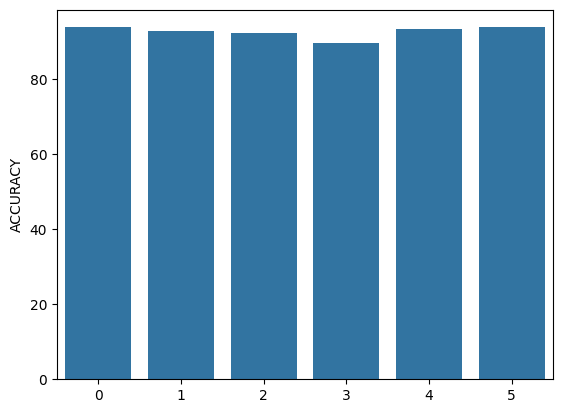

In [49]:
#this clearly shows that linear regression has the highest accuracy
sns.barplot(final['ACCURACY'])

============================== PRECISION SCORE =================================

In [50]:
#now checking the other factors too
from sklearn.metrics import precision_score,recall_score,f1_score

In [51]:
P1=precision_score(Y_test,y_pred1)
P2=precision_score(Y_test,y_pred2)
P3=precision_score(Y_test,y_pred3)
P4=precision_score(Y_test,y_pred4)
P5=precision_score(Y_test,y_pred5)
P6=precision_score(Y_test,y_pred6)

In [52]:
print(P1,P2,P3,P4,P5,P6)

0.96875 0.9782608695652174 0.9578947368421052 0.8942307692307693 0.968421052631579 0.96875


In [53]:
#to show it in more proper way
final1 = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GB'],
            'PRECISION SCORE':[P1*100,
                  P2*100,
                  P3*100,
                  P4*100,
                  P5*100,
                  P6*100]})

In [54]:
final1

,Models,PRECISION SCORE
0,LR,96.875000
1,SVC,97.826087
2,KNN,95.789474
3,DT,89.423077
4,RF,96.842105
5,GB,96.875000


<Axes: ylabel='PRECISION SCORE'>

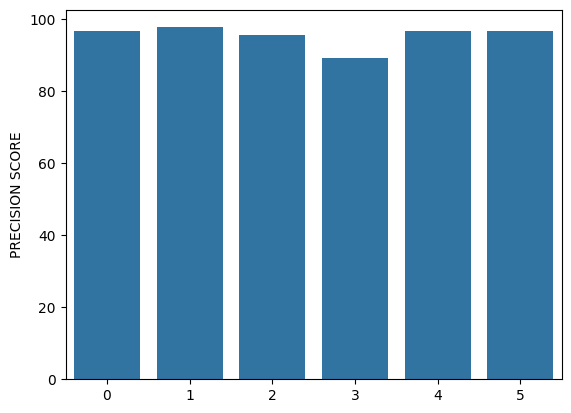

In [55]:
sns.barplot(final1['PRECISION SCORE'])

==================================RECALL SCORE======================================

In [56]:
r1=recall_score(Y_test,y_pred1)
r2=recall_score(Y_test,y_pred2)
r3=recall_score(Y_test,y_pred3)
r4=recall_score(Y_test,y_pred4)
r5=recall_score(Y_test,y_pred5)
r6=recall_score(Y_test,y_pred6)

In [57]:
print(r1,r2,r3,r4,r5,r6)

0.9117647058823529 0.8823529411764706 0.8921568627450981 0.9117647058823529 0.9019607843137255 0.9117647058823529


In [58]:
#to show it in more proper way
final2 = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GB'],
            'RECALL SCORE ':[r1*100,
                  r2*100,
                  r3*100,
                  r4*100,
                  r5*100,
                  r6*100]})

In [59]:
final2

,Models,RECALL SCORE
0,LR,91.176471
1,SVC,88.235294
2,KNN,89.215686
3,DT,91.176471
4,RF,90.196078
5,GB,91.176471


================================== F1 SCORE -----------------------------------

In [60]:
F1S =f1_score(Y_test,y_pred1)
F2S =f1_score(Y_test,y_pred2)
F3S =f1_score(Y_test,y_pred3)
F4S =f1_score(Y_test,y_pred4)
F5S =f1_score(Y_test,y_pred5)
F6S =f1_score(Y_test,y_pred6)

In [61]:
print(F1S,F2S,F3S,F4S,F5S,F6S)

0.9393939393939394 0.9278350515463918 0.9238578680203046 0.9029126213592233 0.934010152284264 0.9393939393939394


In [62]:
final3 = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GB'],
            'F1 SCORE ':[F1S*100,
                  F2S*100,
                  F3S*100,
                  F3S*100,
                  F4S*100,
                  F5S*100]})

In [63]:
final3

,Models,F1 SCORE
0,LR,93.939394
1,SVC,92.783505
2,KNN,92.385787
3,DT,92.385787
4,RF,90.291262
5,GB,93.401015


### LINEAR REGRESSION HAD THE BEST VALUES IN ALL OF THEM

#### OVERSAMPLING

In [64]:
X = creditcard_dataset.drop('Class',axis=1)
Y = creditcard_dataset['Class']

In [65]:
X.shape

(283726, 29)

In [66]:
Y.shape

(283726,)

In [67]:
#we are applying oversamping method in this similar datasets are created to balance the dataset
from imblearn.over_sampling import SMOTE

In [68]:
X_res,Y_res = SMOTE().fit_resample(X,Y)

In [69]:
Y_res.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_res,Y_res,test_size=0.20, random_state=42)

### AFTER OVERSAMPLING NOW WE ARE AGAIN FINDING THE BEST ALGORITHM

In [71]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = knn.predict(X_test)
y_pred4 = dt.predict(X_test)
y_pred5 = rf.predict(X_test)
y_pred6 = gb.predict(X_test)

In [72]:
score1=accuracy_score(Y_test,y_pred1)
score2=accuracy_score(Y_test,y_pred2)
score3=accuracy_score(Y_test,y_pred3)
score4=accuracy_score(Y_test,y_pred4)
score5=accuracy_score(Y_test,y_pred5)
score6=accuracy_score(Y_test,y_pred6)

In [73]:
print(score1,score2,score3,score4,score5,score6)

0.9406277029531694 0.929701152671621 0.9446788229687031 0.9095426382588128 0.9505127888298529 0.9482092107818044


WE CHOOSE RANDOMFOREST CLASSIFIER AS IT HAS THE HIGHEST ACCURACY AFTER BALANCING THE DATA

### Save The Model

In [74]:
rf1 = RandomForestClassifier()
rf1.fit(X_res,Y_res)

RandomForestClassifier()

In [75]:
import joblib

In [76]:
joblib.dump(rf1,"credit_card_model")

['credit_card_model']

In [77]:
model = joblib.load("credit_card_model")

In [78]:
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

In [79]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")

Normal Transcation


In [ ]:
from tkinter import *
import joblib

def show_entry_fields():
    v1=float(e1.get())
    v2=float(e2.get())
    v3=float(e3.get())
    v4=float(e4.get())
    v5=float(e5.get())
    v6=float(e6.get())

    v7=float(e7.get())
    v8=float(e8.get())
    v9=float(e9.get())
    v10=float(e10.get())
    v11=float(e11.get())
    v12=float(e12.get())

    v13=float(e13.get())
    v14=float(e14.get())
    v15=float(e15.get())
    v16=float(e16.get())
    v17=float(e17.get())
    v18=float(e18.get())


    v19=float(e19.get())
    v20=float(e20.get())
    v21=float(e21.get())
    v22=float(e22.get())
    v23=float(e23.get())
    v24=float(e24.get())


    v25=float(e25.get())
    v26=float(e26.get())
    v27=float(e27.get())
    v28=float(e28.get())
    v29=float(e29.get())


    model = joblib.load('model_credit.pkl')
    y_pred = model.predict([[v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,
                                v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29]])
    list1=[v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,
                                v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29]

    result = []
    if y_pred ==0:

        result.append("Normal Transcation")
    else:

        result.append("Fraudulent Transcation")
    print("######################################")
    print("Credit Card Fraud Detection System", result)
    print("######################################")



    Label(master, text="Final Prediction from the model - credit card fraud detection").grid(row=31)
    Label(master, text=result).grid(row=32)



master = Tk()
master.title("Credit Card Fraud Detection System")


label = Label(master, text = "Credit Card Fraud Detection System"
                          , bg = "black", fg = "white",width = 30).grid(row=0,columnspan=2)


Label(master, text="Enter value of V1").grid(row=1)
Label(master, text="Enter value of V2").grid(row=2)
Label(master, text="Enter value of V3").grid(row=3)
Label(master, text="Enter value of V4").grid(row=4)
Label(master, text="Enter value of V5").grid(row=5)
Label(master, text="Enter value of V6").grid(row=6)

Label(master, text="Enter value of V7").grid(row=7)
Label(master, text="Enter value of V8").grid(row=8)
Label(master, text="Enter value of V9").grid(row=9)
Label(master, text="Enter value of V10").grid(row=10)
Label(master, text="Enter value of V11").grid(row=11)
Label(master, text="Enter value of V12").grid(row=12)

Label(master, text="Enter value of V13").grid(row=13)
Label(master, text="Enter value of V14").grid(row=14)
Label(master, text="Enter value of V15").grid(row=15)
Label(master, text="Enter value of V16").grid(row=16)
Label(master, text="Enter value of V17").grid(row=17)
Label(master, text="Enter value of V18").grid(row=18)

Label(master, text="Enter value of V19").grid(row=19)
Label(master, text="Enter value of V20").grid(row=20)
Label(master, text="Enter value of V21").grid(row=21)
Label(master, text="Enter value of V22").grid(row=22)
Label(master, text="Enter value of V23").grid(row=23)
Label(master, text="Enter value of V24").grid(row=24)

Label(master, text="Enter value of V25").grid(row=25)
Label(master, text="Enter value of V26").grid(row=26)
Label(master, text="Enter value of V27").grid(row=27)
Label(master, text="Enter value of V28").grid(row=28)
Label(master, text="Enter value of V29").grid(row=29)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)

e13 = Entry(master)
e14 = Entry(master)
e15 = Entry(master)
e16 = Entry(master)
e17 = Entry(master)
e18= Entry(master)

e19 = Entry(master)
e20 = Entry(master)
e21 = Entry(master)
e22 = Entry(master)
e23= Entry(master)
e24 = Entry(master)


e25 = Entry(master)
e26= Entry(master)
e27 = Entry(master)
e28 = Entry(master)
e29= Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)

e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)


e13.grid(row=13, column=1)
e14.grid(row=14, column=1)
e15.grid(row=15, column=1)
e16.grid(row=16, column=1)
e17.grid(row=17, column=1)
e18.grid(row=18, column=1)


e19.grid(row=19, column=1)
e20.grid(row=20, column=1)
e21.grid(row=21, column=1)
e22.grid(row=22, column=1)
e23.grid(row=23, column=1)
e24.grid(row=24, column=1)

e25.grid(row=25, column=1)
e26.grid(row=26, column=1)
e27.grid(row=27, column=1)
e28.grid(row=28, column=1)
e29.grid(row=29, column=1)
 
Button(master, text='Predict', command=show_entry_fields).grid(row=30, column=1, sticky=W, pady=4)

mainloop( )